# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [1]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create your data variabe using .read_csv 
df = pd.read_csv('IMDB-Movie-Data.csv')

# get reaquainted with the data by viewing the first 5 rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [2]:
# list the column names
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [3]:
# preview the contents of the 'Genre' column only
print(df['Genre'].describe())

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object


In [4]:
df['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

In [5]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts
genre_counts = df.Genre.value_counts()
print(genre_counts)

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64


In [6]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of 
# all of the unique genre values
# assign this to the variable genre_proportions
genre_proportions = (genre_counts/genre_counts.sum())*100
print(genre_proportions)

Action,Adventure,Sci-Fi    5.0
Drama                      4.8
Comedy,Drama,Romance       3.5
Comedy                     3.2
Drama,Romance              3.1
                          ... 
Action,Comedy,Family       0.1
Action,Crime,Fantasy       0.1
Comedy,Mystery             0.1
Adventure,Comedy,Horror    0.1
Comedy,Family,Fantasy      0.1
Name: Genre, Length: 207, dtype: float64


In [7]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results
(df['Genre'].isna().sum())


0

In [8]:
# use .head() on genre_proportions to get a better look at the top 20 
# remember: .head() can take a parameter to display more than 5 entries 
genre_proportions.head(20)

Action,Adventure,Sci-Fi       5.0
Drama                         4.8
Comedy,Drama,Romance          3.5
Comedy                        3.2
Drama,Romance                 3.1
Animation,Adventure,Comedy    2.7
Action,Adventure,Fantasy      2.7
Comedy,Drama                  2.7
Comedy,Romance                2.6
Crime,Drama,Thriller          2.4
Crime,Drama,Mystery           2.3
Action,Adventure,Drama        1.8
Action,Crime,Drama            1.7
Horror,Thriller               1.6
Drama,Thriller                1.5
Adventure,Family,Fantasy      1.4
Biography,Drama,History       1.4
Action,Adventure,Comedy       1.4
Biography,Drama               1.4
Action,Comedy,Crime           1.2
Name: Genre, dtype: float64

### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [9]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present
df['Revenue (Millions)'].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

In [10]:
print(df['Revenue (Millions)'].isna().sum())
#128 out of 872 values are N/A. I wonder how many are 0s, and if they're valid. Surely some movies didn't make $0!!

128


In [11]:
print((df['Revenue (Millions)'] == 0).sum())

1


In [12]:
df = df.rename(columns={'Revenue (Millions)' : 'Rev'})

In [13]:
#Nice. Let's go ahead and insert the mean into all of the N/A values for revenue. I'll remove the 0 value, too.
df['Rev'] = df.Rev.fillna(82.956376)
print(df['Rev'])

0      333.130000
1      126.460000
2      138.120000
3      270.320000
4      325.020000
          ...    
995     82.956376
996     17.540000
997     58.010000
998     82.956376
999     19.640000
Name: Rev, Length: 1000, dtype: float64


Do we have any missing revenue entries?
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``?
Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

### 3. Make a plot distribution of the revenue data.


<Axes: xlabel='Rev', ylabel='Count'>

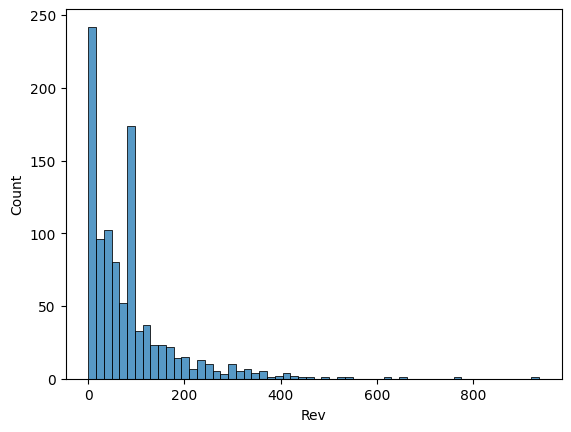

In [14]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.
sns.histplot(data=df, x='Rev')

Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

In [15]:
sorted_Rev = df.nlargest(20, 'Rev')

print(sorted_Rev)

     Rank                                         Title  \
50     51    Star Wars: Episode VII - The Force Awakens   
87     88                                        Avatar   
85     86                                Jurassic World   
76     77                                  The Avengers   
54     55                               The Dark Knight   
12     13                                     Rogue One   
119   120                                  Finding Dory   
94     95                       Avengers: Age of Ultron   
124   125                         The Dark Knight Rises   
578   579               The Hunger Games: Catching Fire   
78     79    Pirates of the Caribbean: Dead Man's Chest   
688   689                                   Toy Story 3   
279   280                                Iron Man Three   
35     36                    Captain America: Civil War   
151   152                              The Hunger Games   
710   711           Transformers: Revenge of the Fallen 

<Axes: xlabel='Rev', ylabel='Count'>

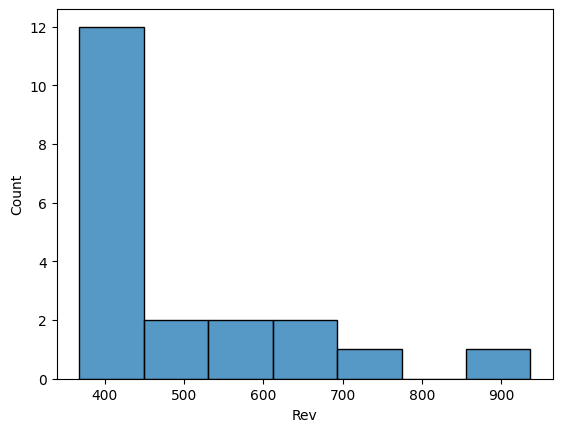

In [16]:

sns.histplot(data=sorted_Rev, x=sorted_Rev['Rev'])

### 4. Find the % of movies with a higher than avergage Rating

In [17]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.
mean_rating = df['Rating'].dropna().mean()
print(mean_rating)


6.723199999999999


In [18]:
# Find the dataset where a movie's rating is higher than mean_rating. 
# Divide that by the length of the total dataset.
len(df[df["Rating"] > mean_rating])/len(df)

0.513

### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [19]:
# run describe on the rating column
df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

In [23]:
# Plot the rating data against genres
# First, lets mirror what our reference article plots
df["RatingGenres"]=pd.cut(df.Rating, [2,4,6,8,10])
#print(df['RatingGenres'].head(10))
plt.figure(figsize=(12,5))
sns.boxplot(x = "Genre", y = "RatingGenres", data=df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x500 with 0 Axes>

<Axes: xlabel='Genre', ylabel='Rating'>

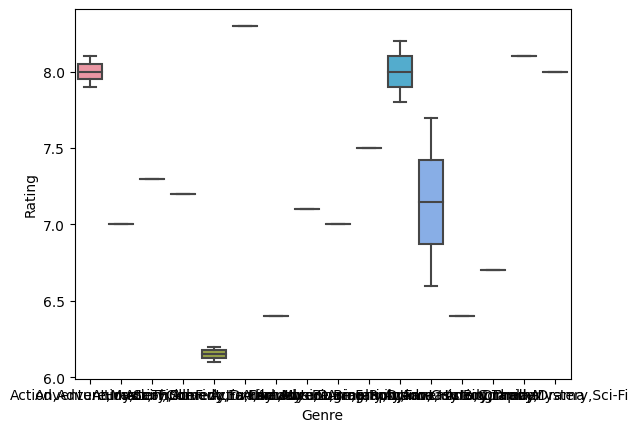

In [23]:
sns.boxplot(x = "Genre", y = "Rating", data=df.head(20))

<Axes: xlabel='Genre', ylabel='Rating'>

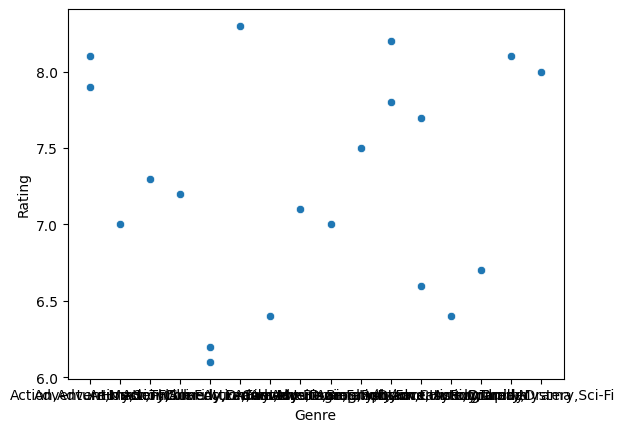

In [24]:
sns.scatterplot(x = "Genre", y = "Rating", data=df.head(20))

That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret?
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

### 6. Make a chart to show the number of films in each rating group each year

In [24]:
# Create a new column called rating_group
# Use to pd.cut() to bin(group) the rating_group column values by integer intervals 1-10
rating_group = pd.cut(df.Rating, [1,2,3,4,5,6,7,8,9,10])

In [25]:
print(rating_group.head(20))

0     (8, 9]
1     (6, 7]
2     (7, 8]
3     (7, 8]
4     (6, 7]
5     (6, 7]
6     (8, 9]
7     (6, 7]
8     (7, 8]
9     (6, 7]
10    (7, 8]
11    (7, 8]
12    (7, 8]
13    (7, 8]
14    (6, 7]
15    (6, 7]
16    (8, 9]
17    (6, 7]
18    (8, 9]
19    (7, 8]
Name: Rating, dtype: category
Categories (9, interval[int64, right]): [(1, 2] < (2, 3] < (3, 4] < (4, 5] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]


In [38]:
dx = df.dropna().groupby(["rating_group", "Year"])["Year"].value_counts()

KeyError: 'rating_group'

<Axes: xlabel='Year', ylabel='Count'>

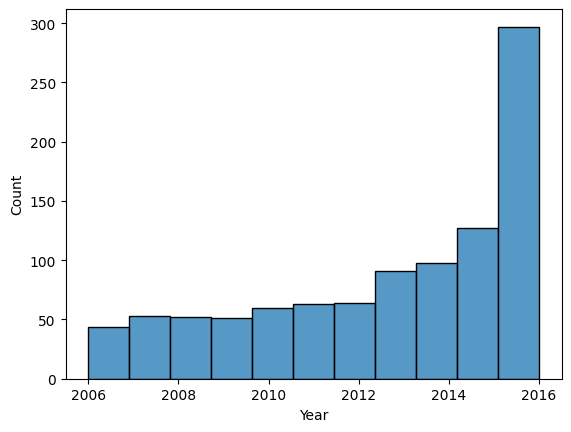

In [32]:
sns.histplot(df.Year)

In [28]:
# Make a chart to show the number of films in each rating group per year
sns.histplot(data='rating_group', x='Year')

ValueError: Could not interpret value `Year` for parameter `x`

# Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above?